references:

*   https://geopandas.org/en/stable/getting_started/introduction.html
*   https://pyrosm.readthedocs.io/en/latest/basics.html



important information:


*   PBF is a recommended osm file extension mainly because it requires little memory size
*   List item



In [ ]:
!pip install pyrosm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.1 MB 40.9 MB/s 
     |████████████████████████████████| 1.0 MB 61.3 MB/s 
     |████████████████████████████████| 1.6 MB 36.0 MB/s 
  Using cached pyrobuf-0.9.3-cp37-cp37m-linux_x86_64.whl
  Using cached cykhash-2.0.0-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 16.7 MB 41.8 MB/s 
     |████████████████████████████████| 6.3 MB 19.8 MB/s 
  Created wheel for pyrosm: filename=pyrosm-0.6.1-cp37-cp37m-linux_x86_64.whl size=5430543 sha256=a70c7af0de619183ce69785a5a479f38ccc8d3af6774cd45f9de63674675c1a5
  Stored in directory: /root/.cache/pip/wheels/e8/9e/d8/e424ffc5eaa71ccb122bb79d92ef75802c49b9b0a9366d6da4
Successfully built pyrosm


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import the library
import pyrosm

# Print information about the basic usage of the `OSM` reader object
help(pyrosm.OSM.__init__)

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Help on function __init__ in module pyrosm.pyrosm:

__init__(self, filepath, bounding_box=None)
    Initialize self.  See help(type(self)) for accurate signature.



In [ ]:
from pyrosm.data import sources

# Print available source categories
sources.available['subregions']['germany']

['arnsberg_regbez',
 'baden_wuerttemberg',
 'bayern',
 'berlin',
 'brandenburg',
 'bremen',
 'detmold_regbez',
 'duesseldorf_regbez',
 'freiburg_regbez',
 'hamburg',
 'hessen',
 'karlsruhe_regbez',
 'koeln_regbez',
 'mecklenburg_vorpommern',
 'mittelfranken',
 'muenster_regbez',
 'niederbayern',
 'niedersachsen',
 'nordrhein_westfalen',
 'oberbayern',
 'oberfranken',
 'oberpfalz',
 'rheinland_pfalz',
 'saarland',
 'sachsen',
 'sachsen_anhalt',
 'schleswig_holstein',
 'schwaben',
 'stuttgart_regbez',
 'thueringen',
 'tuebingen_regbez',
 'unterfranken']

#4

In [ ]:

# read data from Geofabrik
area_of_interest='tuebingen_regbez'#Frieder, please replace 'saarland' with 'nordrhein_westfalen'
#tuebingen_regbez
fp = pyrosm.get_data(area_of_interest)
print("Filepath to test data:", fp)

# Initialize the OSM object 
osm = pyrosm.OSM(fp)

# See the type
print("Type of 'osm' instance: ", type(osm))

Downloaded Protobuf data 'tuebingen-regbez-latest.osm.pbf' (95.26 MB) to:
'/tmp/pyrosm/tuebingen-regbez-latest.osm.pbf'
Filepath to test data: /tmp/pyrosm/tuebingen-regbez-latest.osm.pbf
Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


In [ ]:
osm

# read buildings

In [ ]:
#the session crashed when using NRW,Baden Wurttemberg, Hessen, rheinland_pfalz
#colab uses 12 GB RAM
#buildings = osm.get_buildings(custom_filter={'building': ['residential']},extra_attributes=['building'])
buildings = osm.get_buildings()

In [ ]:
buildings.plot(figsize=(10,10))
#xaxis=longitude, yaxis=latitude

@Frieder, please select all the code before this text and press "runtime/run selection"

In [ ]:
buildings.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,Saarbrücken,DE,4,None,66130,None,Wolfsau,None,Globus Güdingen,Mo-Sa 08:00-20:00,...,None,None,None,15031513,1645680819,16,"{""brand"":""Globus"",""brand:wikidata"":""Q457503"",""...",way,"POLYGON ((7.02632 49.20895, 7.02661 49.20912, ...",NaN
1,Kleinblittersdorf,DE,1a,None,66271,None,Siedlerstraße,None,Musikschule Obere Saar,None,...,None,None,None,15234403,1563303092,7,"{""contact:website"":""http://www.musikschule-obe...",way,"POLYGON ((7.06542 49.13002, 7.06578 49.13011, ...",NaN
2,Kleinblittersdorf,DE,42,None,66271,None,Ruppertstraße,None,Ruppertshof,None,...,None,None,None,16311078,1563226201,2,None,way,"POLYGON ((7.05592 49.14090, 7.05637 49.14096, ...",NaN
3,None,DE,53,None,66127,None,Hauptstraße,None,GS / ERS Klarenthal,None,...,None,None,None,23804730,1643650880,10,"{""roof:shape"":""gabled""}",way,"POLYGON ((6.89811 49.22971, 6.89847 49.22911, ...",NaN
4,Saarbrücken,None,118,None,66119,None,Theodor-Heuss-Straße,None,Parkhaus,None,...,None,None,None,23937017,1621965196,11,"{""access"":""yes"",""fee"":""yes"",""parking"":""multi-s...",way,"POLYGON ((6.99234 49.22105, 6.99242 49.22077, ...",NaN


In [ ]:
buildings.tail()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
565484,None,None,None,None,None,NaN,None,NaN,None,None,...,None,None,None,29084589633,1627713139,1,"{""type"":""multipolygon""}",relation,"POLYGON ((6.88811 49.22409, 6.88818 49.22415, ...",0.0
565485,None,None,None,None,None,NaN,None,NaN,None,None,...,None,None,None,29097629127,1627713139,1,"{""type"":""multipolygon""}",relation,"POLYGON ((6.88789 49.22389, 6.88796 49.22395, ...",0.0
565486,Saarbrücken,DE,6,None,66119,NaN,Sigebertstraße,NaN,KiGa,None,...,None,None,None,29202144350,1629219471,1,"{""type"":""multipolygon""}",relation,"POLYGON ((7.01508 49.21500, 7.01550 49.21507, ...",0.0
565487,Saarbrücken,DE,61,None,66119,NaN,Lehmkaulweg,NaN,LUA Labor,None,...,None,None,None,29215245524,1629219471,1,"{""type"":""multipolygon""}",relation,"POLYGON ((7.01296 49.21384, 7.01294 49.21388, ...",0.0
565488,Saarbrücken,None,C6 4,None,66123,NaN,Campus,NaN,None,None,...,None,None,None,33072381602,1650616433,1,"{""type"":""multipolygon""}",relation,"POLYGON ((7.04404 49.25471, 7.04359 49.25467, ...",0.0


In [ ]:
buildings.shape

(565489, 38)

In [ ]:
buildings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 565489 entries, 0 to 565488
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   addr:city           322584 non-null  object  
 1   addr:country        303867 non-null  object  
 2   addr:housenumber    326518 non-null  object  
 3   addr:housename      135 non-null     object  
 4   addr:postcode       325447 non-null  object  
 5   addr:place          2 non-null       object  
 6   addr:street         326533 non-null  object  
 7   email               128 non-null     object  
 8   name                8884 non-null    object  
 9   opening_hours       520 non-null     object  
 10  operator            957 non-null     object  
 11  phone               503 non-null     object  
 12  ref                 344 non-null     object  
 13  url                 28 non-null      object  
 14  website             906 non-null     object  
 15  building 

In [ ]:
#number of unique values per column
buildings.nunique(axis=0)

addr:city                 79
addr:country               3
addr:housenumber        2304
addr:housename           128
addr:postcode             96
addr:place                 2
addr:street             8502
email                    125
name                    7345
opening_hours            337
operator                 555
phone                    498
ref                      289
url                       26
website                  843
building                 108
amenity                   82
building:flats             2
building:levels           17
building:material         12
building:min_level         2
building:use              43
craft                     33
height                    59
internet_access            5
landuse                    7
office                    33
shop                      97
source                   107
start_date               275
wikipedia                171
id                    565489
timestamp             103263
version                   32
tags          

In [ ]:
buildings.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:housename',
       'addr:postcode', 'addr:place', 'addr:street', 'email', 'name',
       'opening_hours', 'operator', 'phone', 'ref', 'url', 'website',
       'building', 'amenity', 'building:flats', 'building:levels',
       'building:material', 'building:min_level', 'building:use', 'craft',
       'height', 'internet_access', 'landuse', 'office', 'shop', 'source',
       'start_date', 'wikipedia', 'id', 'timestamp', 'version', 'tags',
       'osm_type', 'geometry', 'changeset'],
      dtype='object')

**what variables should we filter?**

In [ ]:
print('columns without similar values:\n')
for col in buildings.columns:
  if len(buildings[col].unique())==len(buildings):
    print(col)

columns without similar values:

id
geometry


**every building is defined by two unique characteristics: id & geometry**

In [ ]:
nan_per_column={col:len(buildings.loc[(buildings[col].isnull()) | (buildings[col].isna())])/len(buildings)*100 for col in buildings.columns}
#plt.hist(x=nan_per_column.keys(),bins=nan_per_column.values())
nan_per_column

{'addr:city': 42.95485853836237,
 'addr:country': 46.264737245109984,
 'addr:housename': 99.976126856579,
 'addr:housenumber': 42.25917745526438,
 'addr:place': 99.99964632380117,
 'addr:postcode': 42.44857105973768,
 'addr:street': 42.25652488377316,
 'amenity': 99.49282833087824,
 'building': 0.0,
 'building:flats': 99.99964632380117,
 'building:levels': 98.58175844269296,
 'building:material': 99.97541950418135,
 'building:min_level': 99.9977011047076,
 'building:use': 98.12215622231378,
 'changeset': 99.98125516146203,
 'craft': 99.96640076111119,
 'email': 99.9773647232749,
 'geometry': 0.0,
 'height': 99.94783276067261,
 'id': 0.0,
 'internet_access': 99.98744449494154,
 'landuse': 99.99274963792399,
 'name': 98.42897032479854,
 'office': 99.96374818961996,
 'opening_hours': 99.90804418830427,
 'operator': 99.83076593886,
 'osm_type': 0.0,
 'phone': 99.91105043599433,
 'ref': 99.9391676938013,
 'shop': 99.75950018479581,
 'source': 96.36827595231738,
 'start_date': 99.87833538760

In [ ]:
print(str(len({key:value for (key,value) in nan_per_column.items() if value>99}))+' out of 38 columns have more than 99% of its values as nan values')

22 out of 38 columns have more than 99% of its values as nan values


In [ ]:
#sort the dictionary by values
sorted(nan_per_column.items(), key=lambda kv: kv[1])

[('building', 0.0),
 ('id', 0.0),
 ('timestamp', 0.0),
 ('version', 0.0),
 ('osm_type', 0.0),
 ('geometry', 0.0),
 ('addr:street', 42.25652488377316),
 ('addr:housenumber', 42.25917745526438),
 ('addr:postcode', 42.44857105973768),
 ('addr:city', 42.95485853836237),
 ('addr:country', 46.264737245109984),
 ('tags', 92.31107943744263),
 ('source', 96.36827595231738),
 ('building:use', 98.12215622231378),
 ('name', 98.42897032479854),
 ('building:levels', 98.58175844269296),
 ('amenity', 99.49282833087824),
 ('shop', 99.75950018479581),
 ('operator', 99.83076593886),
 ('website', 99.83978468193015),
 ('start_date', 99.87833538760259),
 ('opening_hours', 99.90804418830427),
 ('phone', 99.91105043599433),
 ('ref', 99.9391676938013),
 ('height', 99.94783276067261),
 ('office', 99.96374818961996),
 ('wikipedia', 99.96516289441527),
 ('craft', 99.96640076111119),
 ('building:material', 99.97541950418135),
 ('addr:housename', 99.976126856579),
 ('email', 99.9773647232749),
 ('changeset', 99.981

**remove them!!!**

# columns that can be used 

In [ ]:
buildings.building

0                yes
1                yes
2                yes
3             school
4                yes
             ...    
565484           yes
565485           yes
565486           yes
565487           yes
565488    university
Name: building, Length: 565489, dtype: object

In [ ]:
#after we can filter the interesting building types for our study
buildings['building'].unique()

array(['yes', 'school', 'sports_hall', 'retail', 'public', 'parking',
       'house', 'commercial', 'church', 'office', 'chapel', 'university',
       'hospital', 'kindergarten', 'apartments', 'dormitory', 'shed',
       'industrial', 'farm', 'fire_station', 'garage', 'stable',
       'farm_auxiliary', 'greenhouse', 'roof', 'stilt_house', 'hotel',
       'service', 'civic', 'hut', 'hangar', 'detached', 'supermarket',
       'college', 'residential', 'garages', 'passage', 'train_station',
       'toilets', 'sports_centre', 'shop', 'allotment_house',
       'storage_tank', 'temple', 'synagogue', 'terrace',
       'semidetached_house', 'dwelling_house', 'transportation', 'ruins',
       'container', 'cooling_tower', 'construction', 'barn', 'carport',
       'bakery', 'mosque', 'government', 'doctors', 'cs', 'warehouse',
       'chimney', 'transformer_tower', 'museum', 'kiosk', 'bungalow',
       'water_tower', 'bunker', 'offices', 'leisure', 'prefabricated',
       'castle', 'pavilion', '

In [ ]:
buildings.osm_type

0              way
1              way
2              way
3              way
4              way
            ...   
565484    relation
565485    relation
565486    relation
565487    relation
565488    relation
Name: osm_type, Length: 565489, dtype: object

In [ ]:
buildings.osm_type.unique()

array(['way', 'relation'], dtype=object)



*   ways :defining linear features and area boundaries
*   relations (which are sometimes used to explain how other elements work together).



In [ ]:
buildings.version.unique()
###???????????? what does this attribute mean

array([16,  7,  2, 10, 11, 28, 13,  6,  8,  9,  3,  5,  4, 12, 17, 19,  1,
       14, 23, 20, 38, 25, 46, 18, 22, 29, 15, 32, 24, 21, 35, 26],
      dtype=int8)

In [ ]:
buildings.timestamp.unique()

array([1645680819, 1563303092, 1563226201, ..., 1598987678, 1623681569,
       1650616433])

In [ ]:
len(buildings.timestamp.unique())

103263

# other important attributes (unfortunately they contains a high amount of missing values) 

In [ ]:
#start_date=date of construction???
#if yes, we can use it as an estimate of the age of building

buildings['start_date'].unique()
#can estimate number of buildings with it!!!

array([None, '1766', '1989', '1955', '1982', '1775', '1735', '1930-03-16',
       '1966', '1475', '1709', '1719', '1710..1720', '1809', '1730',
       '1973', '1736', 'C13', '1908', '1926', '1920', '1885',
       '~1860...1870', '1888', '1865', '1792', '1806', '1914-06-14',
       '~1872', '1739', '1895..1898', '1939', '1841', '1897', '1901',
       '2020-11-19', '1827', '1758', '1880', '1954', 'before 1833',
       '1902', '1949..1950', '1738', '~1900', 'um 1900', 'um 1905',
       'um 1910-1920', '1797', '1913', '1909', '1914', '1890', '1904',
       '1900', '1900..1901', '1923', '1904..1905', '1905', '1899', '1952',
       '1898', '1899..1900', '1912', '1908..1909', '1911', '1881', '1936',
       '1964', '1779', '1822', '1949', '1924', '~1780', '1952..1953',
       '1846', '1925..1926', '1907', '1951', 'unknown', '1801', '~1727',
       '1906', 'um 1935', '1927..1928', '1876', '1886', '1872', '1961',
       '1989-11-30', '1982-08-15', '2012-10-19', '1871', '1972', '1850',
       'vo

In [ ]:
buildings['landuse'].unique()

array([None, 'greenhouse_horticulture', 'industrial', 'garages', 'retail',
       'grass', 'military', 'construction', nan], dtype=object)

In [ ]:
buildings['building:use'].unique()

array([None, 'school', 'church', 'residential', 'office', 'shop',
       'industrial', 'university', 'nursing_home', 'hospital', 'theatre',
       'hotel;office', 'music_school', 'yes', 'offices', 'commercial',
       'garages', 'garage', 'hotel', 'retail', 'kindergarten',
       'educational', 'courthouse', 'restaurant', 'parking', 'education',
       'gymnasium', 'agricultural', 'barn', 'manufacture', 'museum',
       'supermarket', 'concert_hall', 'social_facility', 'disused', 'bar',
       'academy', 'Künstleratelier', 'place_of_worship', 'multi', 'civic',
       'hunting', 'storage', 'multipurpose'], dtype=object)

In [ ]:
buildings['building:min_level'].unique()

array([None, '1', '2', nan], dtype=object)

In [ ]:
buildings['building:material'].unique()

array([None, 'sandstone', 'plaster', 'brick', 'stone', 'metal',
       'concrete', 'wood', 'cement_block', 'steel', 'metal;wood', 'glass',
       'glass;metal', nan], dtype=object)

In [ ]:
buildings['building:flats'].unique()

array([None, '20', '2', nan], dtype=object)

In [ ]:
buildings['building:levels'].unique()


array([None, '2', '1', '5', '3', '8', '11', '4', '12', '7', '10', '6',
       '15', '0', '18', '9', '13', '23'], dtype=object)

In [ ]:
buildings['timestamp'].unique()


array([1645680819, 1563303092, 1563226201, ..., 1598987678, 1623681569,
       1650616433])

In [ ]:
buildings.type.unique()


array(['Polygon', 'MultiPolygon'], dtype=object)

**the dataset requires obvisously cleaning and filling missing data**




In [ ]:
buldingss=buildings
buildingss = buildings.set_index("building")
buildingss["area"] = buildingss.area
buildingss['area']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


building
yes           1.773228e-06
yes           4.855676e-08
yes           1.339657e-07
school        4.077209e-07
yes           3.747274e-07
                  ...     
yes           2.262614e-08
yes           2.487156e-08
yes           9.563486e-08
yes           4.261771e-07
university    2.399521e-07
Name: area, Length: 565487, dtype: float64

In [ ]:
buildingss['boundary']=buildingss.boundary
buildingss['boundary']

building
yes           LINESTRING (7.02632 49.20895, 7.02661 49.20912...
yes           LINESTRING (7.06542 49.13002, 7.06578 49.13011...
yes           LINESTRING (7.05592 49.14090, 7.05637 49.14096...
school        LINESTRING (6.89811 49.22971, 6.89847 49.22911...
yes           LINESTRING (6.99234 49.22105, 6.99242 49.22077...
                                    ...                        
yes           LINESTRING (6.88811 49.22409, 6.88818 49.22415...
yes           LINESTRING (6.88789 49.22389, 6.88796 49.22395...
yes           MULTILINESTRING ((7.01508 49.21500, 7.01550 49...
yes           MULTILINESTRING ((7.01296 49.21384, 7.01294 49...
university    MULTILINESTRING ((7.04404 49.25471, 7.04359 49...
Name: boundary, Length: 565487, dtype: geometry

In [ ]:
buildingss['centroid']=buildingss.centroid
buildingss['centroid']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


building
yes           POINT (7.02609 49.20965)
yes           POINT (7.06563 49.13001)
yes           POINT (7.05618 49.14078)
school        POINT (6.89876 49.22944)
yes           POINT (6.99303 49.22098)
                        ...           
yes           POINT (6.88827 49.22407)
yes           POINT (6.88806 49.22387)
yes           POINT (7.01534 49.21491)
yes           POINT (7.01333 49.21363)
university    POINT (7.04387 49.25439)
Name: centroid, Length: 565487, dtype: geometry

# read points of interest

All available OSM keys ['aerialway', 'aeroway', 'amenity', 'building', 'craft',
        'emergency', 'geological', 'highway', 'historic', 'landuse', 'leisure',
        'natural', 'office', 'power', 'public_transport', 'railway', 'route',
        'place', 'shop', 'tourism', 'waterway']

print("Typical tags associated with tourism:", Conf.tags.tourism)
['alpine_hut', 'apartment', 'aquarium', 'artwork', 'attraction', 'camp_pitch',
'camp_site', 'caravan_site', 'chalet', 'gallery', 'guest_house', 'hostel',
'hotel', 'information', 'motel', 'museum', 'picnic_site', 'theme_park',
'tourism', 'viewpoint', 'wilderness_hut', 'zoo']

In [ ]:
custom_filter = {'building': True, "office": True, 'shop':True, 'power': True} 
pois = osm.get_pois(custom_filter=custom_filter)

pois["building"] = pois["building"].fillna(' ')
pois["office"] = pois["office"].fillna(' ')
pois["shop"] = pois["shop"].fillna(' ')
pois["power"] = pois["power"].fillna(' ')
pois["poi_type"] = pois["building"] + pois["office"] + pois["shop"] + pois["power"]

/usr/local/lib/python3.7/dist-packages/pyrosm/pyrosm.py:583: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.bounding_box,


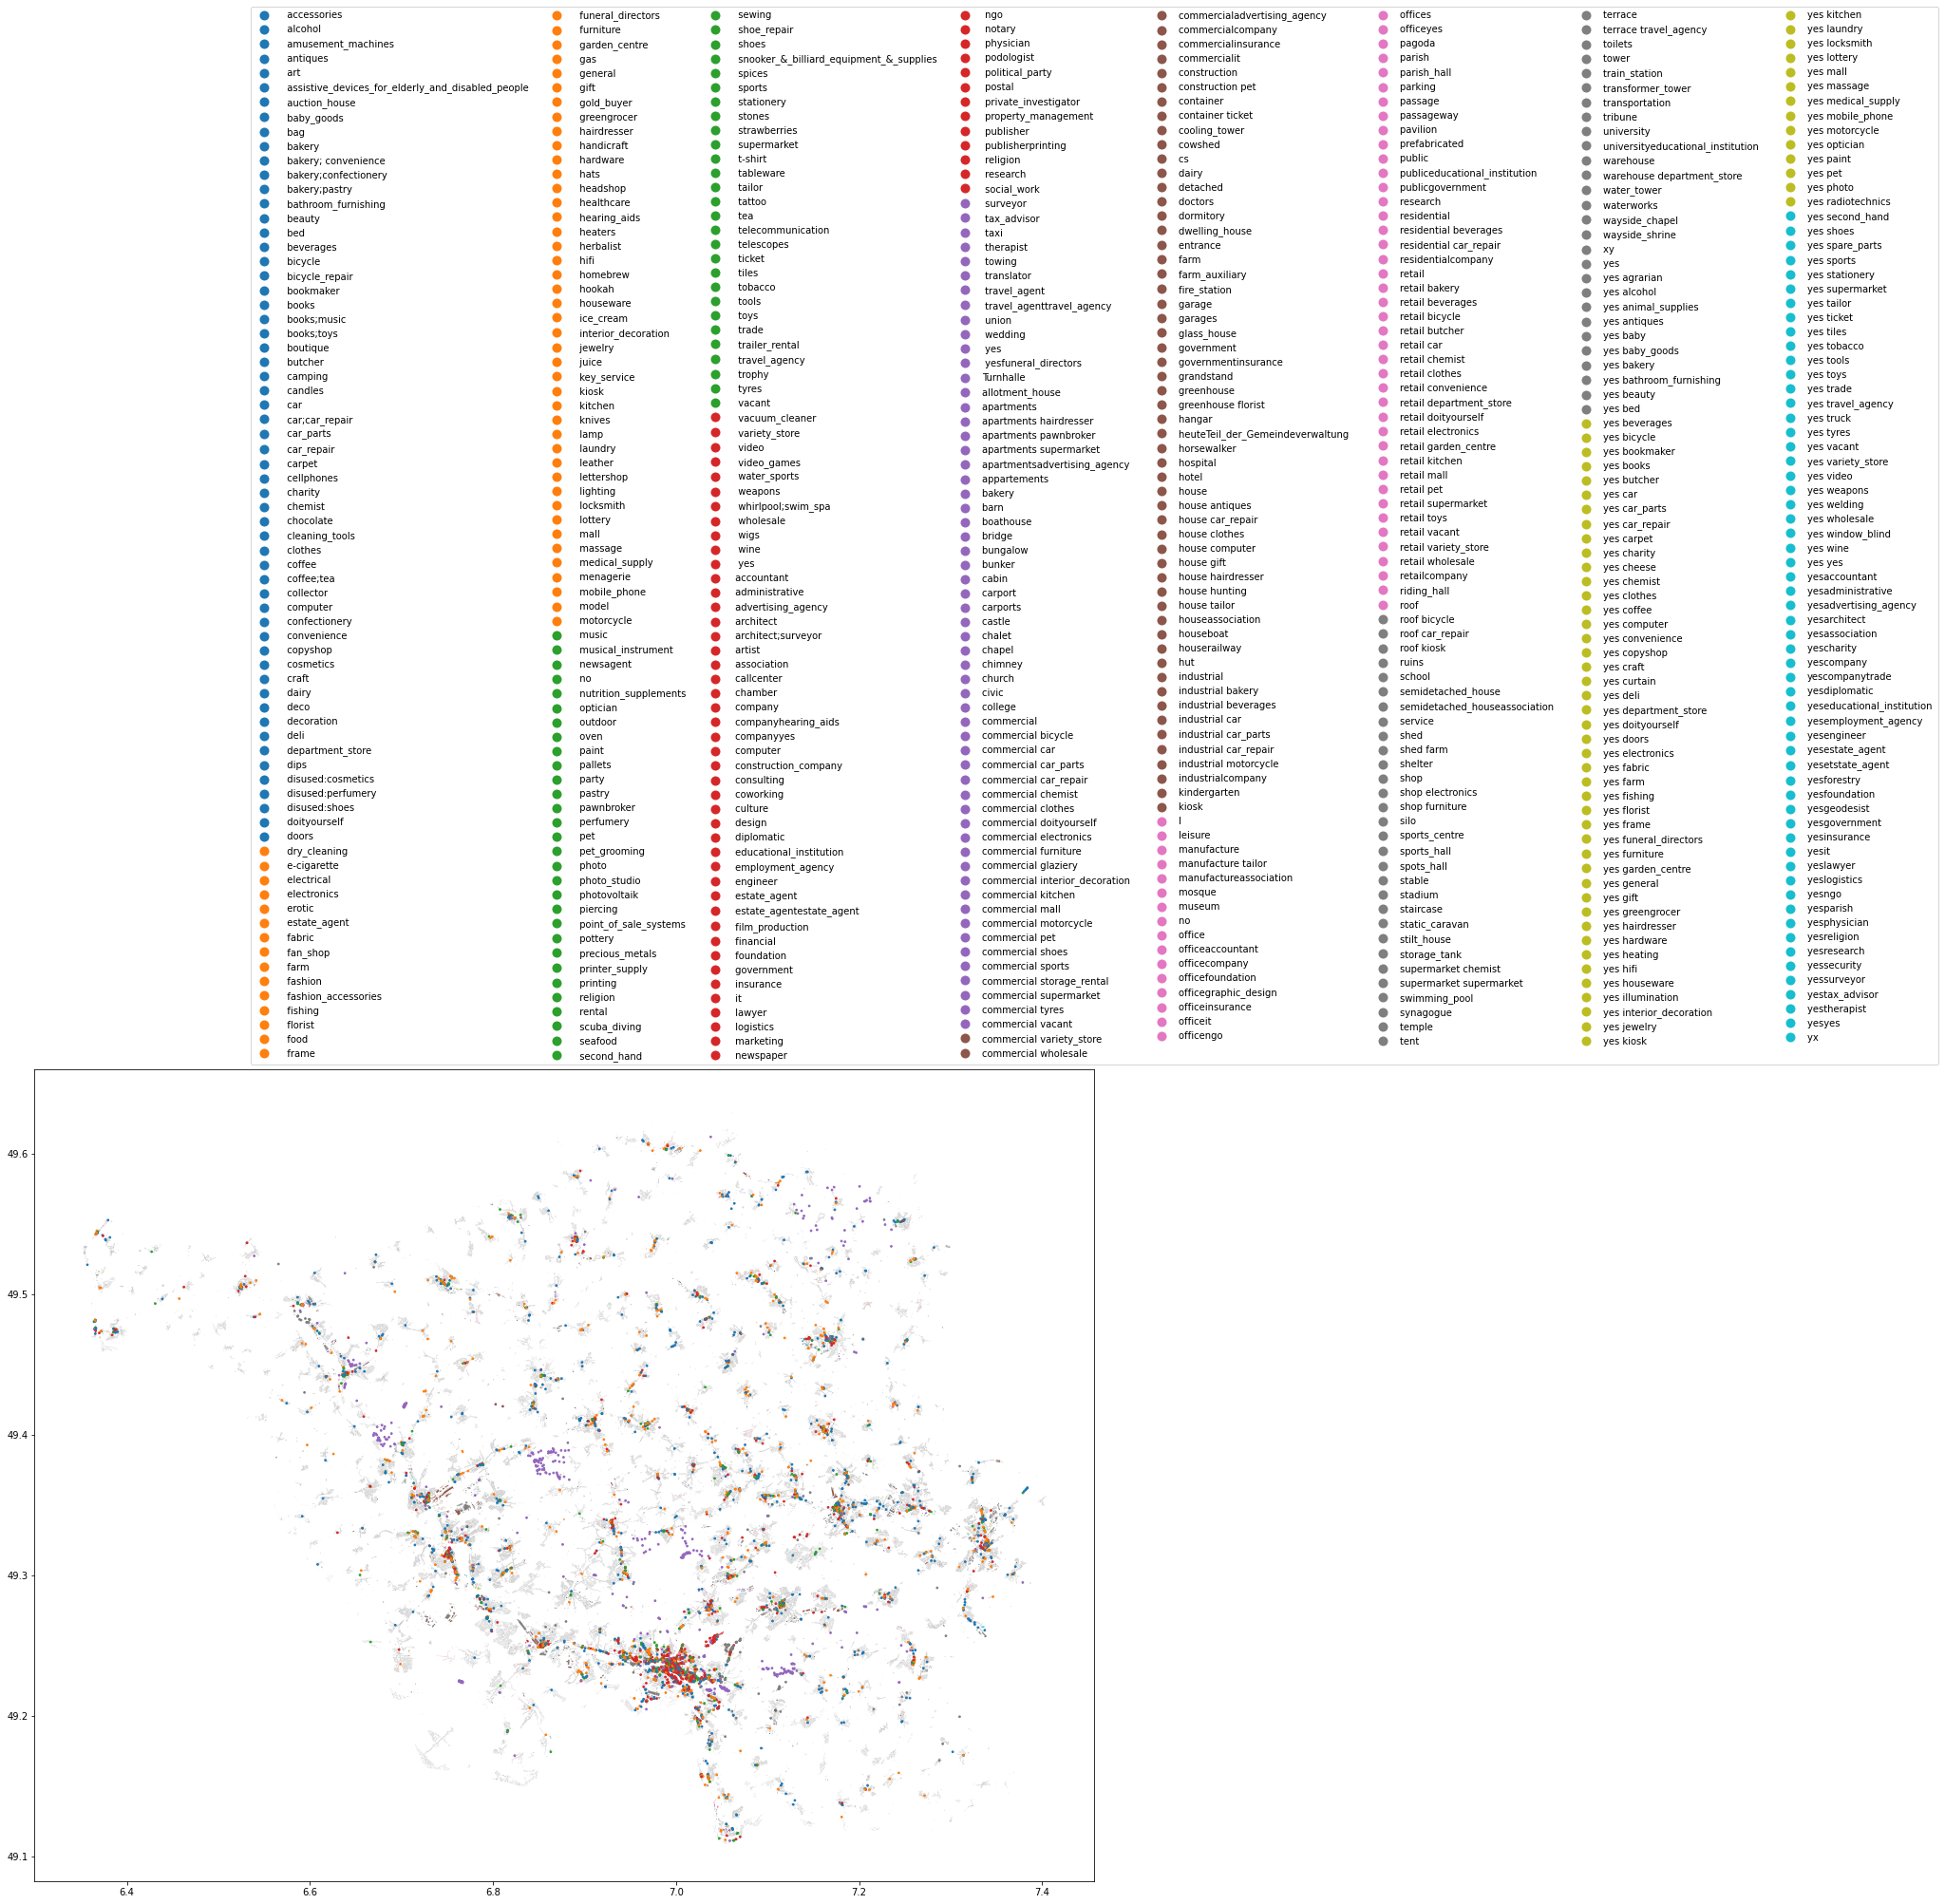

In [ ]:
# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(20,20), legend=True, 
               legend_kwds=dict(loc='lower center', ncol=8, bbox_to_anchor=(1, 1)))

the red lines in the previous plot represent the "power" feature

other useful data can be found in: 

*   how to extract buildings' age data from zensus2011? (see p34)
*   https://open.nrw/ : contains building data
*   https://gdz.bkg.bund.de/index.php/default/digitales-basis-landschaftsmodell-ebenen-basis-dlm-ebenen.html : contains block data
*   https://scihub.copernicus.eu/ : contains remote sensing data

